Графики показывающие зависимость показаний от резисторов


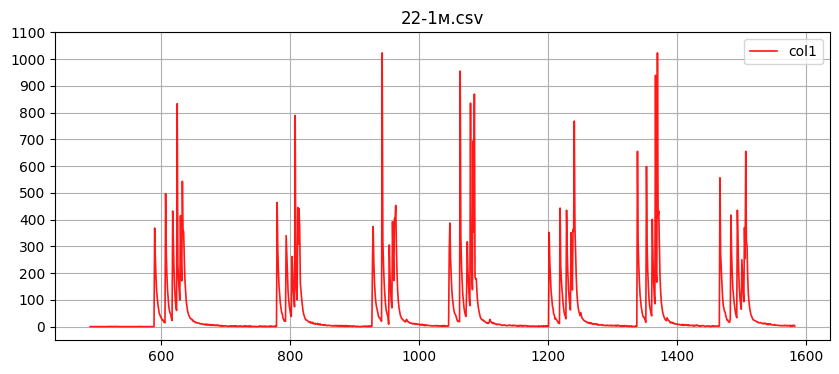

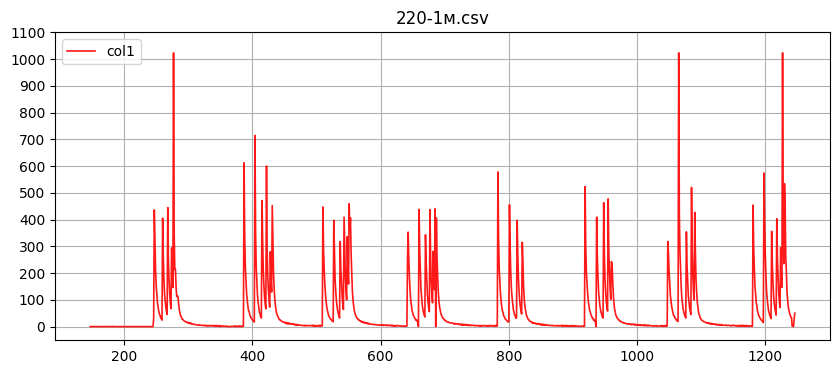

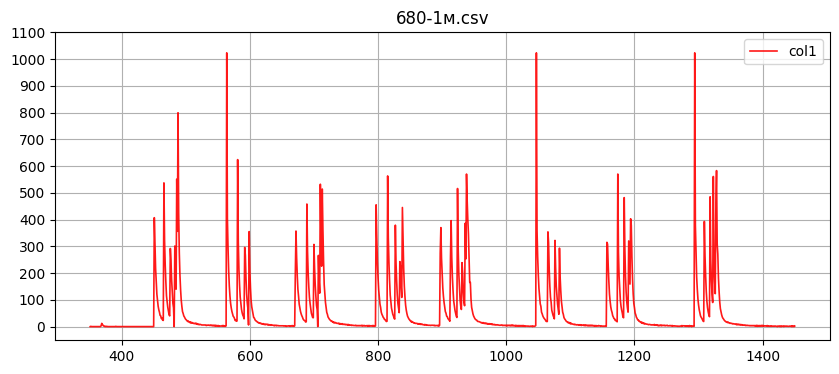

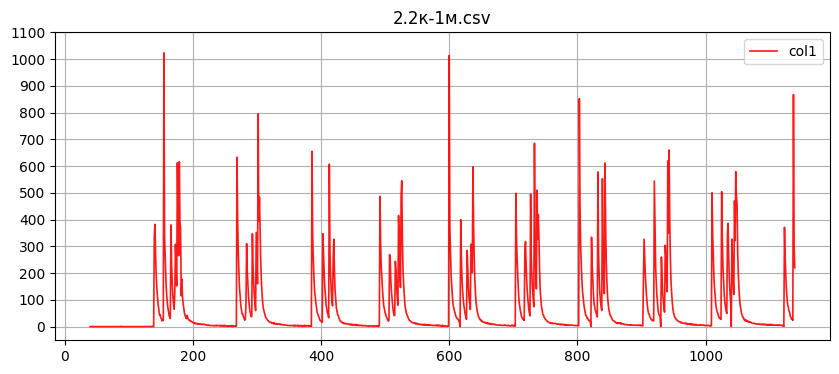

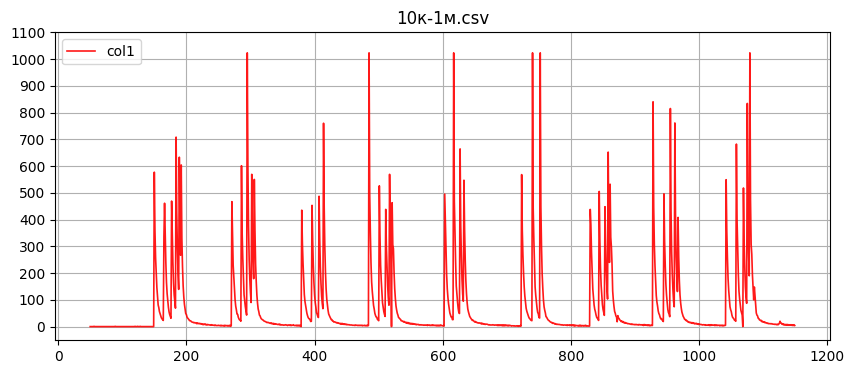

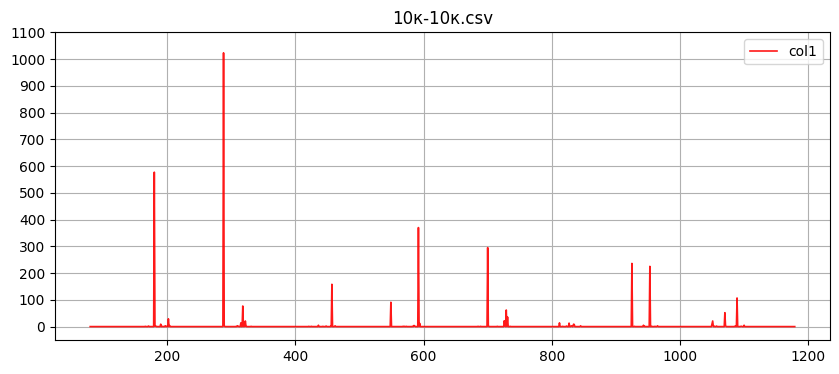

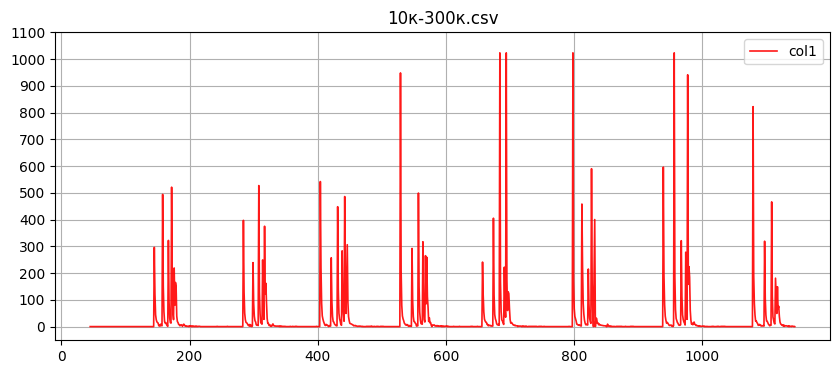

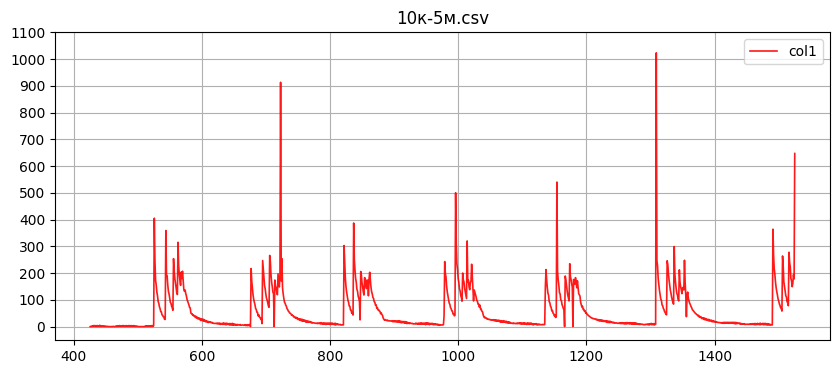

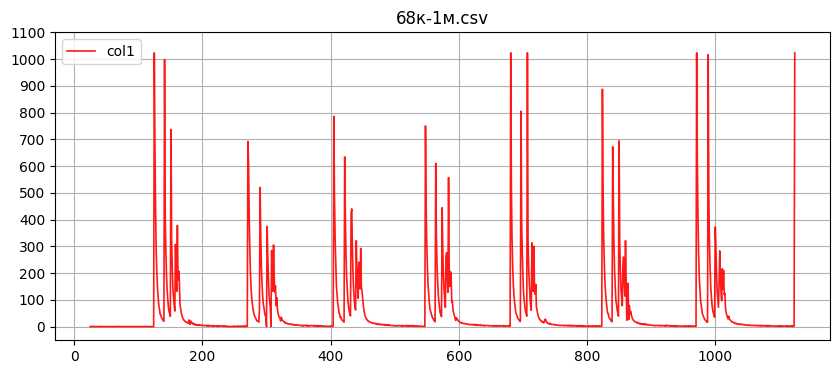

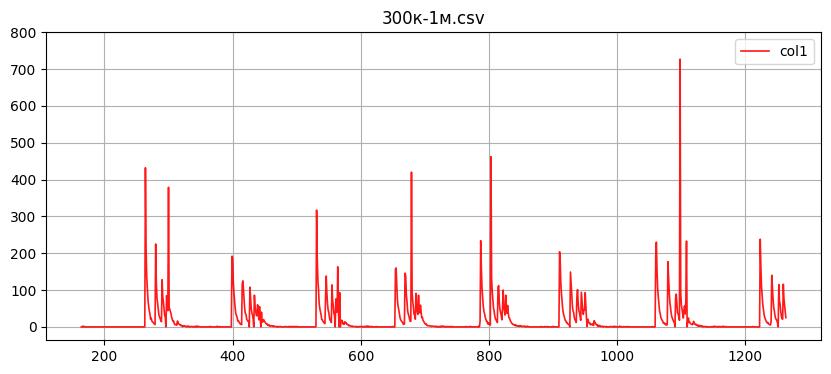

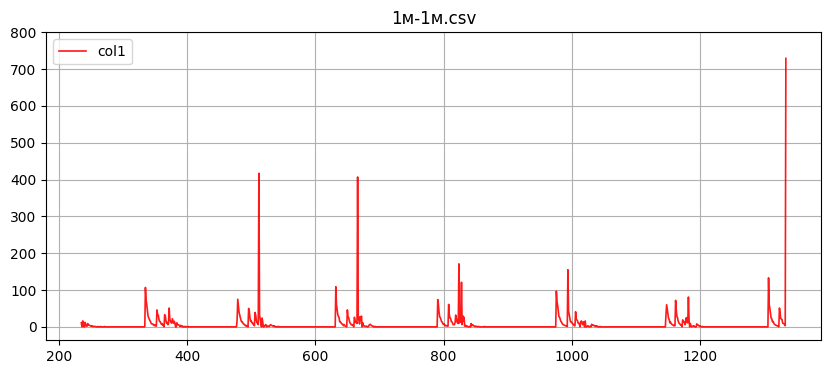

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
print("Графики показывающие зависимость показаний от резисторов")

files = [
    "22-1м.csv", "220-1м.csv", "680-1м.csv", "2.2к-1м.csv", "10к-1м.csv", "10к-10к.csv", 
    "10к-300к.csv", "10к-5м.csv", "68к-1м.csv", "300к-1м.csv", "1м-1м.csv"
 ]
folder = "C:/Projects/Damge_analitic/Data_sets"

for fname in files:
    df = pd.read_csv(f"{folder}/{fname}", header=None)
    df = df.apply(pd.to_numeric, errors='coerce')
    # Найти индекс первого всплеска (любое значение > 100)
    spike_idx = None
    for i in range(len(df)):
        if (df.iloc[i] > 100).any():
            spike_idx = i
            break
    if spike_idx is None:
        print(f"В файле {fname} всплеск не найден.")
        continue
    start_idx = max(spike_idx - 100, 0)
    end_idx = min(spike_idx + 1000, len(df))
    df_slice = df.iloc[start_idx:end_idx]
    plt.figure(figsize=(10, 4))
    for col in df_slice.columns:
        plt.plot(df_slice[col], label=f"col{col+1}", color='red', alpha=0.9, linewidth=1.2)
    plt.title(fname)
    plt.legend()
    plt.grid(True)
    ymin = int(df_slice.min().min() // 100 * 100)
    ymax = int(df_slice.max().max() // 100 * 100 + 100)
    plt.yticks(range(ymin, ymax+1, 100))
    plt.show()